In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import seaborn as sns

import statsmodels.api as sm
from sklearn.svm import SVC

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.cluster.hierarchical import AgglomerativeClustering
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import scipy.stats as stats
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from mlxtend.plotting import plot_learning_curves
from mlxtend.plotting import plot_decision_regions
from sklearn.ensemble import AdaBoostClassifier
from mlxtend.classifier import StackingClassifier
import itertools


%matplotlib inline

In [42]:
pd.set_option('display.max_columns',100)
df = pd.read_csv("superstore_dataset2011-2015 classification.csv", encoding = 'unicode_escape')

In [43]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,NaN,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,NaN,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium
2,48883,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,Hungary,NaN,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High
3,11731,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,Sweden,NaN,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High
4,22255,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,NaN,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
Row ID            51290 non-null int64
Order ID          51290 non-null object
Order Date        51290 non-null object
Ship Date         51290 non-null object
Ship Mode         51290 non-null object
Customer ID       51290 non-null object
Customer Name     51290 non-null object
Segment           51290 non-null object
City              51290 non-null object
State             51290 non-null object
Country           51290 non-null object
Postal Code       9994 non-null float64
Market            51290 non-null object
Region            51290 non-null object
Product ID        51290 non-null object
Category          51290 non-null object
Sub-Category      51290 non-null object
Product Name      51290 non-null object
Sales             51290 non-null float64
Quantity          51290 non-null int64
Discount          51290 non-null float64
Profit            51290 non-null float64
Shipping C

In [45]:
for i in df.columns:
    print(df[i].value_counts())

2047     1
35460    1
661      1
2708     1
12947    1
        ..
46396    1
36155    1
34106    1
40249    1
2049     1
Name: Row ID, Length: 51290, dtype: int64
CA-2014-100111     14
NI-2014-8880       13
TO-2014-9950       13
MX-2014-166541     13
IN-2012-41261      13
                   ..
CA-2014-166296      1
US-2014-125626      1
MX-2012-151211      1
MX-2014-165694      1
ES-2013-4638107     1
Name: Order ID, Length: 25035, dtype: int64
18-06-2014    135
18-11-2014    127
3/9/2014      126
20-11-2014    118
29-12-2014    116
             ... 
13-02-2011      1
15-07-2012      1
6/1/2013        1
19-06-2011      1
17-03-2013      1
Name: Order Date, Length: 1430, dtype: int64
22-11-2014    130
7/9/2014      115
7/12/2014     101
17-11-2014    101
29-11-2014    100
             ... 
21-03-2013      3
25-01-2011      3
3/1/2011        2
6/1/2011        2
5/1/2011        2
Name: Ship Date, Length: 1464, dtype: int64
Standard Class    30775
Second Class      10309
First Class       

In [46]:
for i in df.columns:
    print(i,len(df[i].unique()))

Row ID 51290
Order ID 25035
Order Date 1430
Ship Date 1464
Ship Mode 4
Customer ID 1590
Customer Name 795
Segment 3
City 3636
State 1094
Country 147
Postal Code 632
Market 7
Region 13
Product ID 10292
Category 3
Sub-Category 17
Product Name 3788
Sales 22995
Quantity 14
Discount 27
Profit 24575
Shipping Cost 10037
Order Priority 4


In [47]:
for i in df.select_dtypes(include = ['object','bool']):
    print(i,len(df[i].unique()))

Order ID 25035
Order Date 1430
Ship Date 1464
Ship Mode 4
Customer ID 1590
Customer Name 795
Segment 3
City 3636
State 1094
Country 147
Market 7
Region 13
Product ID 10292
Category 3
Sub-Category 17
Product Name 3788
Order Priority 4


In [48]:
cross1 = pd.crosstab(df['Ship Mode'],df['Order Priority'])
cross1

Order Priority,Critical,High,Low,Medium
Ship Mode,,,,
First Class,1734,3413,0,2358
Same Day,742,1269,0,690
Second Class,1456,4010,0,4843
Standard Class,0,6809,2424,21542


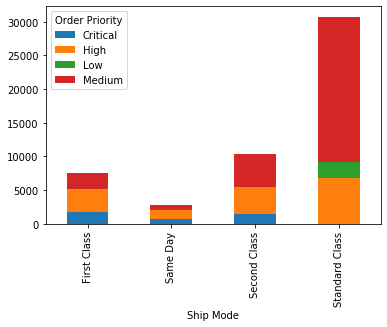

In [49]:
z=cross1.groupby(cross1.index).sum()

z.plot.bar(stacked=True)

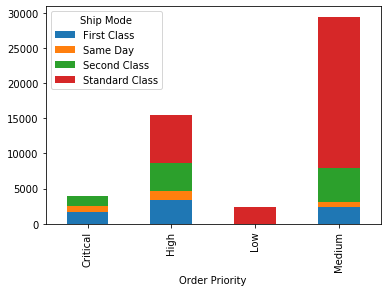

In [50]:
z=cross1.T.groupby(cross1.columns).sum()

z.plot.bar(stacked=True)

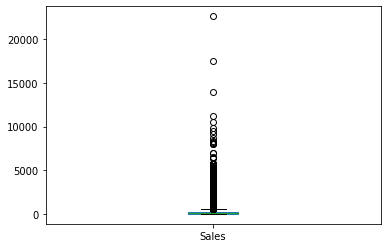

In [51]:
df['Sales'].plot(kind = 'box')

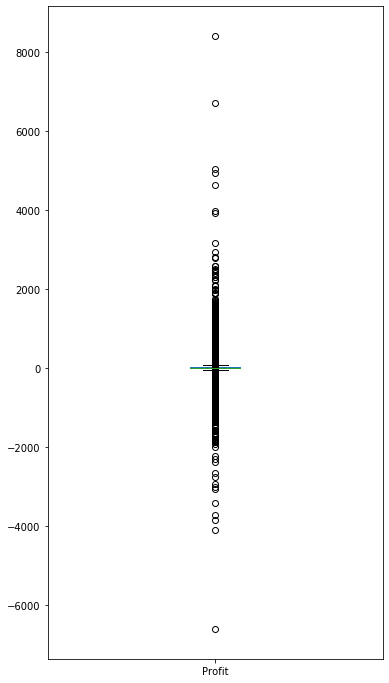

In [52]:
df['Profit'].plot(kind = 'box',figsize=(6,12))

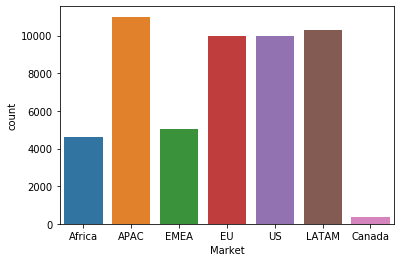

In [53]:
sns.countplot(df['Market'])

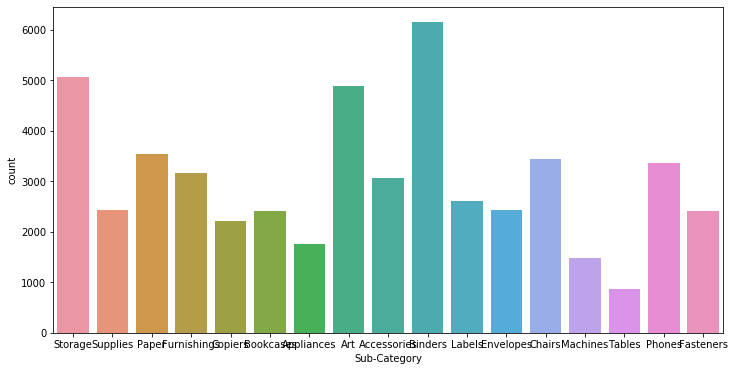

In [54]:
plt.figure(figsize = (12,6))
sns.countplot(df['Sub-Category'])

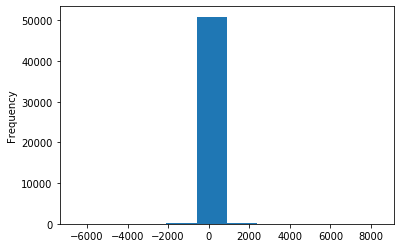

In [55]:
df['Profit'].plot(kind = 'hist')

In [56]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.00000,9994.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,55190.379428,246.490581,3.476545,0.142908,28.610982,26.375915
std,14806.29199,32063.693350,487.565361,2.278766,0.212280,174.340972,57.296804
min,1.00000,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.000000
25%,12823.25000,23223.000000,30.758625,2.000000,0.000000,0.000000,2.610000
50%,25645.50000,56430.500000,85.053000,3.000000,0.000000,9.240000,7.790000
75%,38467.75000,90008.000000,251.053200,5.000000,0.200000,36.810000,24.450000
max,51290.00000,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000


In [57]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [58]:
ds = df[['Ship Mode','Segment','Quantity','Order Priority','Sales','Discount','Profit','Shipping Cost','Category']]
ds.head()

,Ship Mode,Segment,Quantity,Order Priority,Sales,Discount,Profit,Shipping Cost,Category
0,Standard Class,Consumer,2,Medium,408.300,0.0,106.140,35.46,Office Supplies
1,Standard Class,Consumer,3,Medium,120.366,0.1,36.036,9.72,Office Supplies
2,Second Class,Consumer,4,High,66.120,0.0,29.640,8.17,Office Supplies
3,Second Class,Home Office,3,High,44.865,0.5,-26.055,4.82,Office Supplies
4,Standard Class,Consumer,5,Medium,113.670,0.1,37.770,4.70,Furniture


In [59]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 9 columns):
Ship Mode         51290 non-null object
Segment           51290 non-null object
Quantity          51290 non-null int64
Order Priority    51290 non-null object
Sales             51290 non-null float64
Discount          51290 non-null float64
Profit            51290 non-null float64
Shipping Cost     51290 non-null float64
Category          51290 non-null object
dtypes: float64(4), int64(1), object(4)
memory usage: 3.5+ MB


In [60]:
ds.columns

Index(['Ship Mode', 'Segment', 'Quantity', 'Order Priority', 'Sales',
       'Discount', 'Profit', 'Shipping Cost', 'Category'],
      dtype='object')

In [61]:
ds.describe()

,Quantity,Sales,Discount,Profit,Shipping Cost
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,3.476545,246.490581,0.142908,28.610982,26.375915
std,2.278766,487.565361,0.212280,174.340972,57.296804
min,1.000000,0.444000,0.000000,-6599.978000,0.000000
25%,2.000000,30.758625,0.000000,0.000000,2.610000
50%,3.000000,85.053000,0.000000,9.240000,7.790000
75%,5.000000,251.053200,0.200000,36.810000,24.450000
max,14.000000,22638.480000,0.850000,8399.976000,933.570000


##### get dummies

In [62]:
dummy_df = pd.get_dummies(data=ds,columns = ['Ship Mode', 'Segment', 'Category','Quantity'],drop_first=True)
dummy_df.head(3)

,Order Priority,Sales,Discount,Profit,Shipping Cost,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Corporate,Segment_Home Office,Category_Office Supplies,Category_Technology,Quantity_2,Quantity_3,Quantity_4,Quantity_5,Quantity_6,Quantity_7,Quantity_8,Quantity_9,Quantity_10,Quantity_11,Quantity_12,Quantity_13,Quantity_14
0,Medium,408.300,0.0,106.140,35.46,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,Medium,120.366,0.1,36.036,9.72,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,High,66.120,0.0,29.640,8.17,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [63]:
dummy_df.shape

(51290, 25)

In [64]:
dummy_df['Order Priority'].value_counts()

Medium      29433
High        15501
Critical     3932
Low          2424
Name: Order Priority, dtype: int64

In [65]:
fin = dummy_df[(dummy_df['Order Priority'] == 'Medium')|(dummy_df['Order Priority'] == 'High')]

In [66]:
fin.shape

(44934, 25)

In [67]:
fin['Order Priority'] = fin['Order Priority'].map({'Medium':0,'High':1})

In [68]:
fin

,Order Priority,Sales,Discount,Profit,Shipping Cost,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Corporate,Segment_Home Office,Category_Office Supplies,Category_Technology,Quantity_2,Quantity_3,Quantity_4,Quantity_5,Quantity_6,Quantity_7,Quantity_8,Quantity_9,Quantity_10,Quantity_11,Quantity_12,Quantity_13,Quantity_14
0,0,408.300,0.0,106.1400,35.46,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,120.366,0.1,36.0360,9.72,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,66.120,0.0,29.6400,8.17,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,1,44.865,0.5,-26.0550,4.82,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,113.670,0.1,37.7700,4.70,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,0,13.904,0.2,4.5188,0.89,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
51286,0,3.990,0.0,0.4200,0.49,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
51287,0,26.400,0.0,12.3600,0.35,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
51288,0,7.120,0.0,0.5600,0.20,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


###### base model

In [69]:
def statsmodel(x,y):
    x_constant = sm.add_constant(x)
    reg_model = sm.Logit(y,x_constant).fit()
    return reg_model.summary()

def ML_model(lr,x,y):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=0)
    lr.fit(X_train,y_train)
    print('Train score -',lr.score(X_train,y_train))
    print('test score - ',lr.score(X_test,y_test))

In [70]:
X = fin.drop('Order Priority',1)
y = fin['Order Priority']

In [71]:
lr = LogisticRegression(solver = "liblinear")

ML_model(lr,X,y)

Train score - 0.7245413792007122
test score -  0.7238335435056746


In [72]:
statsmodel(X,y)

Optimization terminated successfully.
         Current function value: 0.562829
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         Order Priority   No. Observations:                44934
Model:                          Logit   Df Residuals:                    44909
Method:                           MLE   Df Model:                           24
Date:                Wed, 06 Nov 2019   Pseudo R-squ.:                  0.1264
Time:                        23:22:24   Log-Likelihood:                -25290.
converged:                       True   LL-Null:                       -28950.
Covariance Type:            nonrobust   LLR p-value:                     0.000
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.0880      0.047      1.883      0.060      -0.004       0.180
Sales                       -0.0043      0.000    -37.620      0.000      -0.005      -0.004
Discount                    -0.0698      0.054     -1.287      0.198      -0.176       0.037
Profit                      -0.0002      0.000     -1.426      0.154      -0.000    6.24e-05
Shipping Cost                0.0444      0.001     41.763      0.000       0.042       0.046
Ship Mode_Same Day           0.2842      0.057      4.943      0.000       0.172       0.397
Ship Mode_Second Class      -0.3486      0.036     -9.625      0.000      -0.420      -0.278
Ship Mode_Standard Class    -1.1279      0.032    -34.844      0.000      -1.191      -1.064
Segment_Corporate           -0.1246      0.025     -5.005      0.000      -0.173      -0.076
Segment_Home Office         -0.0409      0.029     -1.394      0.163      -0.098       0.017
Category_Office Supplies     0.0398      0.031      1.303      0.193      -0.020       0.100
Category_Technology          0.0343      0.036      0.943      0.346      -0.037       0.106
Quantity_2                   0.0509      0.033      1.551      0.121      -0.013       0.115
Quantity_3                   0.0120      0.035      0.340      0.734      -0.057       0.081
Quantity_4                  -0.0096      0.040     -0.238      0.812      -0.089       0.069
Quantity_5                   0.0663      0.044      1.499      0.134      -0.020       0.153
Quantity_6                   0.0356      0.053      0.673      0.501      -0.068       0.139
Quantity_7                  -0.0448      0.060     -0.742      0.458      -0.163       0.073
Quantity_8                  -0.0322      0.077     -0.420      0.674      -0.182       0.118
Quantity_9                   0.0877      0.087      1.009      0.313      -0.083       0.258
Quantity_10                  0.1723      0.159      1.083      0.279      -0.140       0.484
Quantity_11                  0.0385      0.214      0.180      0.857      -0.380       0.457
Quantity_12                 -0.4216      0.216     -1.953      0.051      -0.845       0.001
Quantity_13                 -0.2104      0.318     -0.661      0.509      -0.835       0.414
Quantity_14                  0.4281      0.186      2.299      0.022       0.063       0.793
============================================================================================
"""

###### Other Base models

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)

def prediction(X_train, X_test, y_train, y_test):
    models = []
    model_names = []
    models.extend([LogisticRegression(solver = 'liblinear'),DecisionTreeClassifier(),KNeighborsClassifier()
                   ,RandomForestClassifier(n_estimators = 10),GaussianNB()])
    model_names.extend(['lr','dt','knn','rf','GaussianNB'])
    d_frame = pd.DataFrame()
    for algorithm,model_name in zip(models,model_names):
        model = algorithm
        model.fit(X_train,y_train)
        name = model_name+'_'+'pred' 
        pred_values = model.predict(X_test)
        prob_value = model.predict_proba(X_test)[:,-1]
#         name_pred = pd.DataFrame({name:pred_values})
        
#         d_frame = pd.concat([d_frame,name_pred],1)
        print(model_name,'\n',confusion_matrix(y_test,pred_values))
        print(name,'acc',accuracy_score(y_test,pred_values))
        print(name,'auc score ', roc_auc_score(y_test,prob_value))
#     global d_frame
#     return d_frame

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)


prediction(X_train, X_test, y_train, y_test)

lr 
 [[7924  842]
 [2881 1834]]
lr_pred acc 0.7238335435056746
lr_pred auc score  0.7816334633304373
dt 
 [[6862 1904]
 [1807 2908]]
dt_pred acc 0.7247236851865588
dt_pred auc score  0.6997761040015543
knn 
 [[7640 1126]
 [2195 2520]]
knn_pred acc 0.7536532898152956
knn_pred auc score  0.7679620891378989
rf 
 [[7697 1069]
 [2235 2480]]
rf_pred acc 0.7549143238632149
rf_pred auc score  0.7941301698527208
GaussianNB 
 [[7271 1495]
 [3068 1647]]
GaussianNB_pred acc 0.6615236258437801
GaussianNB_pred auc score  0.6701163199472366


In [75]:
def imb_predict(algo,xtrain,xtest,ytrain,ytest):

    algo.fit(xtrain,ytrain)
    y_pred = algo.predict(xtest)
    y_prob = algo.predict_proba(xtest)[:,1]
    
    
    acc = accuracy_score(ytest,y_pred)
    print('Accuracy Score: ', acc)
                                         # FUNCTION TO RUN THE DIFFERENT ALGORITHM MANY TIMES
    auc = roc_auc_score(ytest,y_prob)
    print('AUC:', auc)
    
    print(classification_report(ytest, y_pred))
    
    fpr,tpr,thresh = roc_curve(ytest,y_prob)
#     print(thresh)
    plt.plot(fpr,tpr,'r--')
    plt.plot(fpr,fpr,'b--')
    plt.show()
    

Accuracy Score:  0.7238335435056746
AUC: 0.7816334633304373
              precision    recall  f1-score   support

           0       0.73      0.90      0.81      8766
           1       0.69      0.39      0.50      4715

    accuracy                           0.72     13481
   macro avg       0.71      0.65      0.65     13481
weighted avg       0.72      0.72      0.70     13481



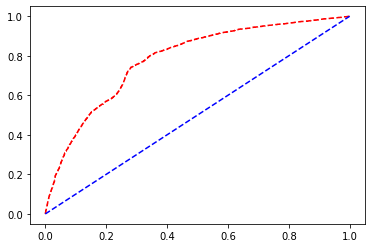

In [76]:

lr = LogisticRegression(solver = 'liblinear',max_iter=500)


imb_predict(lr,X_train,X_test,y_train,y_test)

In [77]:
fin['Order Priority'].value_counts(normalize = True)

0    0.655027
1    0.344973
Name: Order Priority, dtype: float64

##### Handling Imbalanced data

In [78]:
## under sampling

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)    
xy_train = pd.concat([X_train,y_train],1)

xy_train0 = xy_train[xy_train['Order Priority'] == 0]
xy_train1 = xy_train[xy_train['Order Priority'] == 1]

len1 = len(xy_train1)
len0 = len(xy_train0)

Xy_train0_us = xy_train0.sample(n = len1)
                                
Xy_train_us = pd.concat([xy_train1,Xy_train0_us],axis = 0)

X_train_us = Xy_train_us.drop('Order Priority',1)
y_train_us = Xy_train_us['Order Priority']

In [79]:
print(xy_train1.shape)
print(Xy_train0_us.shape)

(10386, 25)
(10386, 25)


Accuracy Score:  0.7150853058196777
AUC: 0.7837315150750366
              precision    recall  f1-score   support

           0       0.79      0.76      0.78      9714
           1       0.58      0.62      0.60      5115

    accuracy                           0.72     14829
   macro avg       0.69      0.69      0.69     14829
weighted avg       0.72      0.72      0.72     14829



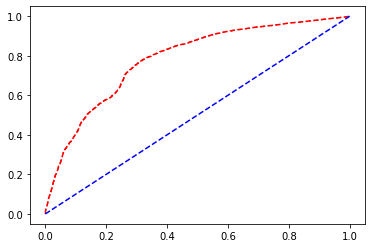

In [80]:
# Undersampling model
lr = LogisticRegression(solver = 'liblinear',max_iter=500)


imb_predict(lr,X_train_us,X_test,y_train_us,y_test)

In [81]:
prediction(X_train_us, X_test, y_train_us, y_test)

lr 
 [[7421 2293]
 [1932 3183]]
lr_pred acc 0.7150853058196777
lr_pred auc score  0.7837315150750366
dt 
 [[6685 3029]
 [1587 3528]]
dt_pred acc 0.688718052464765
dt_pred auc score  0.6889590378671653
knn 
 [[7335 2379]
 [1654 3461]]
knn_pred acc 0.7280329084901207
knn_pred auc score  0.7660901489339991
rf 
 [[7449 2265]
 [1687 3428]]
rf_pred acc 0.7334951783667139
rf_pred auc score  0.7803212945973312
GaussianNB 
 [[7680 2034]
 [3065 2050]]
GaussianNB_pred acc 0.6561467394969317
GaussianNB_pred auc score  0.6646433249991799


Accuracy Score:  0.7391597545350327
AUC: 0.8070402162653452
              precision    recall  f1-score   support

           0       0.85      0.74      0.79      9714
           1       0.60      0.74      0.66      5115

    accuracy                           0.74     14829
   macro avg       0.72      0.74      0.73     14829
weighted avg       0.76      0.74      0.74     14829



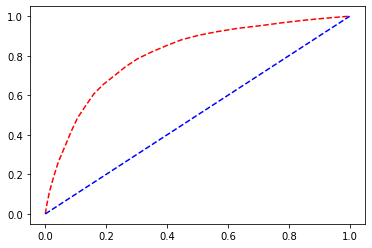

In [82]:

rf = RandomForestClassifier(n_estimators=25)

imb_predict(rf,X_train_us, X_test, y_train_us, y_test)  # since this has higher roc auc score

Accuracy Score:  0.7341695326724661
AUC: 0.8028808276432259
              precision    recall  f1-score   support

           0       0.85      0.73      0.78      9714
           1       0.59      0.75      0.66      5115

    accuracy                           0.73     14829
   macro avg       0.72      0.74      0.72     14829
weighted avg       0.76      0.73      0.74     14829



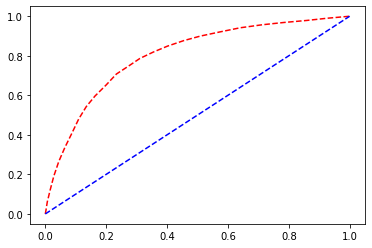

In [83]:
dt = DecisionTreeClassifier(max_depth= 5)

imb_predict(rf,X_train_us, X_test, y_train_us, y_test)  # since this has higher roc auc score

Accuracy Score:  0.7150853058196777
AUC: 0.7837315150750366
              precision    recall  f1-score   support

           0       0.79      0.76      0.78      9714
           1       0.58      0.62      0.60      5115

    accuracy                           0.72     14829
   macro avg       0.69      0.69      0.69     14829
weighted avg       0.72      0.72      0.72     14829



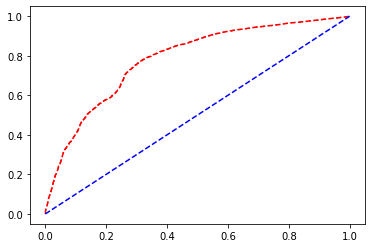

In [84]:
# Over sampling

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)    
xy_train = pd.concat([X_train,y_train],1)


Xy_train=pd.concat([X_train,y_train],axis=1)

Xy_train0=Xy_train[Xy_train['Order Priority']==0]
Xy_train1=Xy_train[Xy_train['Order Priority']==1]

len1 = len(Xy_train1)
len0 = len(Xy_train0)

Xy_train1_os = Xy_train1.sample(n=len0,replace=True)

Xy_train_os = pd.concat([Xy_train0,Xy_train1_os],axis=0)

X_train_os = Xy_train_us.drop('Order Priority',1)
y_train_os = Xy_train_us['Order Priority']


imb_predict(lr,X_train_os,X_test,y_train_os,y_test)

In [85]:
prediction(X_train_os,X_test,y_train_os,y_test)

lr 
 [[7421 2293]
 [1932 3183]]
lr_pred acc 0.7150853058196777
lr_pred auc score  0.7837315150750366
dt 
 [[6714 3000]
 [1559 3556]]
dt_pred acc 0.6925618720075528
dt_pred auc score  0.6931887767270023
knn 
 [[7335 2379]
 [1654 3461]]
knn_pred acc 0.7280329084901207
knn_pred auc score  0.7660901489339991
rf 
 [[7376 2338]
 [1719 3396]]
rf_pred acc 0.7264144581563153
rf_pred auc score  0.7750712810626338
GaussianNB 
 [[7680 2034]
 [3065 2050]]
GaussianNB_pred acc 0.6561467394969317
GaussianNB_pred auc score  0.6646433249991799


Accuracy Score:  0.7376761750623778
AUC: 0.8040027282729867
              precision    recall  f1-score   support

           0       0.85      0.73      0.79      9714
           1       0.60      0.75      0.66      5115

    accuracy                           0.74     14829
   macro avg       0.72      0.74      0.72     14829
weighted avg       0.76      0.74      0.74     14829



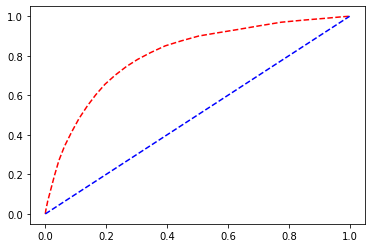

In [86]:

rf = RandomForestClassifier(n_estimators=25)

imb_predict(rf,X_train_os, X_test, y_train_os, y_test)  # since this has higher roc auc score

Accuracy Score:  0.7372715624789264
AUC: 0.803823738188838
              precision    recall  f1-score   support

           0       0.85      0.73      0.79      9714
           1       0.60      0.75      0.66      5115

    accuracy                           0.74     14829
   macro avg       0.72      0.74      0.72     14829
weighted avg       0.76      0.74      0.74     14829



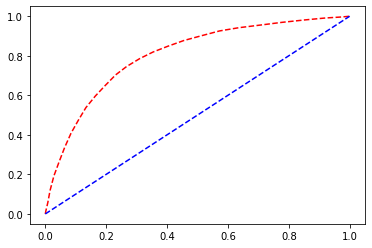

In [87]:
dt = DecisionTreeClassifier(max_depth= 5)

imb_predict(rf,X_train_os, X_test, y_train_os, y_test)  # since this has higher roc auc score

In [88]:
# Smote

from imblearn.over_sampling import SMOTE

smote = SMOTE(ratio = 'minority')
X_train_sm, y_train_sm = smote.fit_sample(X_train, y_train)

Accuracy Score:  0.7165014498617573
AUC: 0.7825129092837156
              precision    recall  f1-score   support

           0       0.79      0.76      0.78      9714
           1       0.58      0.62      0.60      5115

    accuracy                           0.72     14829
   macro avg       0.69      0.69      0.69     14829
weighted avg       0.72      0.72      0.72     14829



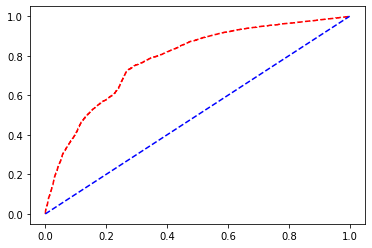

In [89]:
imb_predict(lr,X_train_sm,X_test, y_train_sm,y_test)

In [90]:
prediction(X_train_sm,X_test, y_train_sm,y_test)

lr 
 [[7431 2283]
 [1921 3194]]
lr_pred acc 0.7165014498617573
lr_pred auc score  0.7825129092837156
dt 
 [[7567 2147]
 [2017 3098]]
dt_pred acc 0.7191988670847663
dt_pred auc score  0.6923241963559563
knn 
 [[7172 2542]
 [1714 3401]]
knn_pred acc 0.7129948074718457
knn_pred auc score  0.7539825419510211
rf 
 [[8469 1245]
 [2598 2517]]
rf_pred acc 0.7408456402994134
rf_pred auc score  0.7791729484769792
GaussianNB 
 [[7086 2628]
 [2244 2871]]
GaussianNB_pred acc 0.6714545822375075
GaussianNB_pred auc score  0.6539536612211899


Accuracy Score:  0.749477375413042
AUC: 0.7980850063527543
              precision    recall  f1-score   support

           0       0.78      0.86      0.82      9714
           1       0.67      0.54      0.60      5115

    accuracy                           0.75     14829
   macro avg       0.72      0.70      0.71     14829
weighted avg       0.74      0.75      0.74     14829



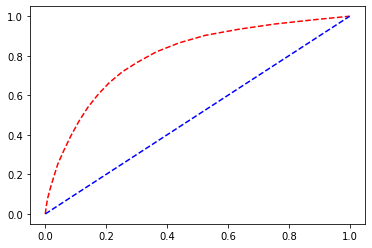

In [91]:
rf = RandomForestClassifier(n_estimators=20)

imb_predict(rf,X_train_sm,X_test, y_train_sm,y_test)

Accuracy Score:  0.7556814350259626
AUC: 0.8082099260753945
              precision    recall  f1-score   support

           0       0.83      0.78      0.81      9714
           1       0.63      0.70      0.66      5115

    accuracy                           0.76     14829
   macro avg       0.73      0.74      0.74     14829
weighted avg       0.76      0.76      0.76     14829



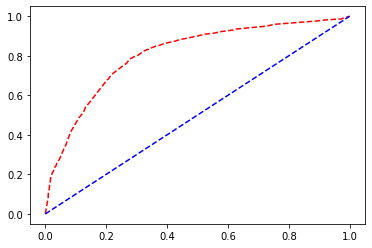

In [92]:
dt = DecisionTreeClassifier(max_depth=10)

imb_predict(dt,X_train_sm,X_test, y_train_sm,y_test)

In [93]:
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydotplus

#putting features
features = list(X.columns)
features

['Sales',
 'Discount',
 'Profit',
 'Shipping Cost',
 'Ship Mode_Same Day',
 'Ship Mode_Second Class',
 'Ship Mode_Standard Class',
 'Segment_Corporate',
 'Segment_Home Office',
 'Category_Office Supplies',
 'Category_Technology',
 'Quantity_2',
 'Quantity_3',
 'Quantity_4',
 'Quantity_5',
 'Quantity_6',
 'Quantity_7',
 'Quantity_8',
 'Quantity_9',
 'Quantity_10',
 'Quantity_11',
 'Quantity_12',
 'Quantity_13',
 'Quantity_14']

##### Decision tree plot

Accuracy Score:  0.6953941600917122
AUC: 0.7000374241931157
              precision    recall  f1-score   support

           0       0.77      0.77      0.77      9714
           1       0.56      0.56      0.56      5115

    accuracy                           0.70     14829
   macro avg       0.66      0.66      0.66     14829
weighted avg       0.70      0.70      0.70     14829



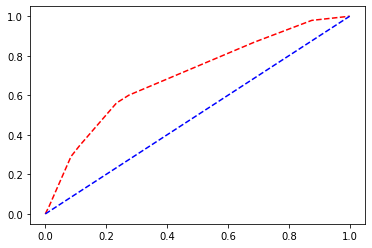

In [94]:
dt = DecisionTreeClassifier(max_depth= 3)

imb_predict(dt,X_train_os, X_test, y_train_os, y_test)  # since this has higher roc auc score

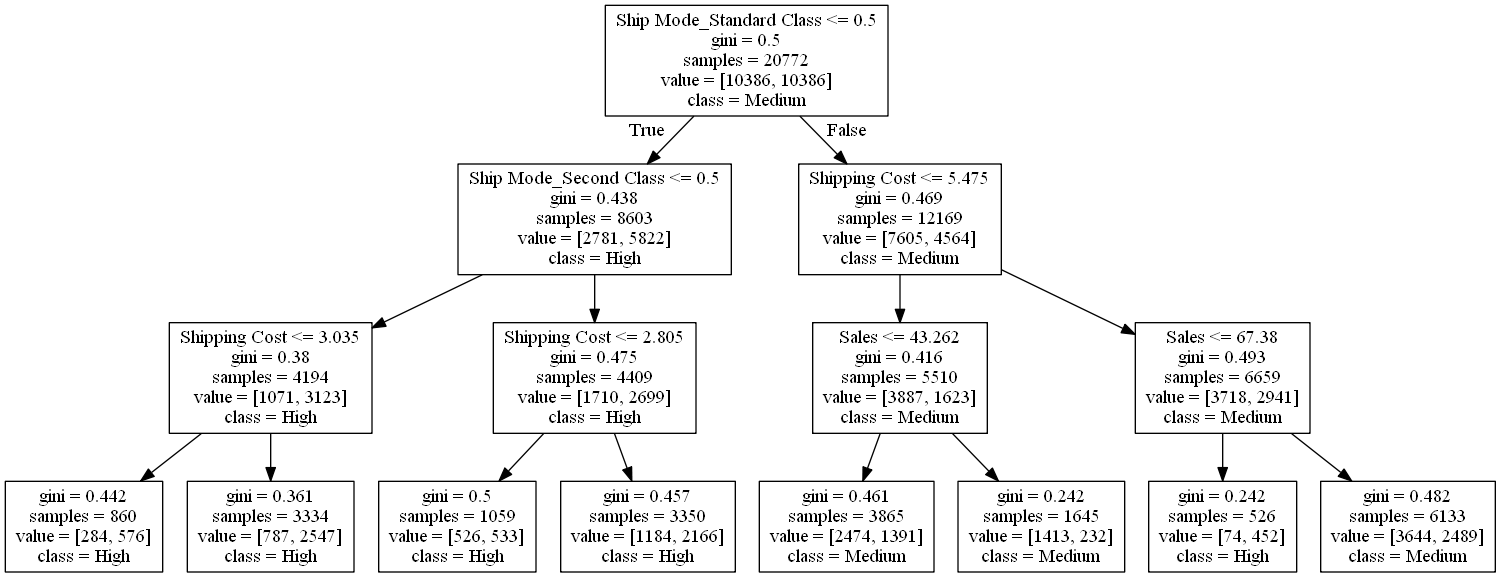

In [72]:
#Create Dot data
dot_data = export_graphviz(dt,out_file = None,feature_names=features,class_names=['Medium','High'])

graph =pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

##### Bagging 

In [56]:
clf1 = DecisionTreeClassifier(criterion='entropy', max_depth=1)
clf2 = KNeighborsClassifier(n_neighbors=1)    

bagging1 = BaggingClassifier(base_estimator=clf1, n_estimators=10, max_samples=0.8, max_features=0.8)
bagging2 = BaggingClassifier(base_estimator=clf2, n_estimators=10, max_samples=0.8, max_features=0.8)

In [58]:
label = ['Decision Tree','Bagging Tree']
clf_list = [clf1,bagging1]

X = np.array(X)
y = np.array(y)


fig = plt.figure(figsize=(10, 8))
gs = gridspec.GridSpec(2, 2)
grid = itertools.product([0,1],repeat=2)

for clf, label, grd in zip(clf_list, label, grid):        
    scores = cross_val_score(clf, X, y, cv=3, scoring='accuracy')
    print ("Accuracy: %.2f (+/- %.2f) [%s]" %(scores.mean(), scores.std(), label))

Accuracy: 0.67 (+/- 0.01) [Decision Tree]
Accuracy: 0.67 (+/- 0.01) [Bagging Tree]


<Figure size 720x576 with 0 Axes>

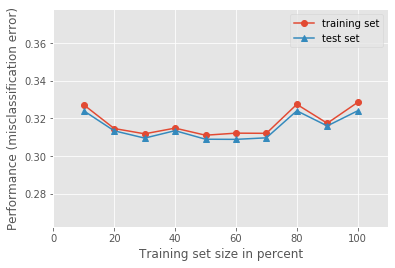

In [100]:
#plot learning curves
X = fin.drop('Order Priority',1)
y = fin['Order Priority']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
plt.figure()
plot_learning_curves(X_train, y_train, X_test, y_test, bagging1, print_model=False, style='ggplot')
plt.show()

In [162]:
clf1 = DecisionTreeClassifier(criterion='entropy', max_depth=1)
clf2 = KNeighborsClassifier(n_neighbors=5)
clf3 = LogisticRegression()

bagging1 = BaggingClassifier(base_estimator=clf1, n_estimators=10, max_samples=0.8, max_features=0.8)
bagging2 = BaggingClassifier(base_estimator=clf2, n_estimators=10, max_samples=0.8, max_features=0.8)
bagging3 = BaggingClassifier(base_estimator=clf3, n_estimators=10, max_samples=0.8, max_features=0.8)
label = ['Decision Tree','Bagging Tree','knn','bagging knn','logit','bagging logit']
clf_list = [clf1,bagging1,clf2,bagging2,clf3,bagging3]
grid = itertools.product([0,1],repeat=3)

for clf, label, grd in zip(clf_list, label, grid):        
    scores =cross_val_score(clf, X_train, y_train, cv=3, scoring='accuracy')
    print ("Accuracy: %.2f (+/- %.2f) [%s]" %(scores.mean(), scores.std(), label))   

Accuracy: 0.67 (+/- 0.00) [Decision Tree]
Accuracy: 0.67 (+/- 0.02) [Bagging Tree]
Accuracy: 0.75 (+/- 0.00) [knn]
Accuracy: 0.75 (+/- 0.01) [bagging knn]
Accuracy: 0.72 (+/- 0.00) [logit]
Accuracy: 0.72 (+/- 0.01) [bagging logit]


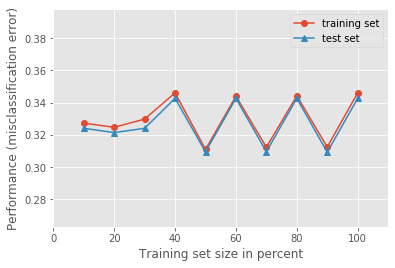

In [102]:
#plotting learning curves
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
plt.figure()
plot_learning_curves(X_train, y_train, X_test, y_test, bagging1, print_model=False, style='ggplot')
plt.show()

##### Boosting

In [103]:
X = np.array(X)
y =np.array(y)

In [173]:
clf1 = DecisionTreeClassifier(max_depth=1)
clf2 = LogisticRegression()



boster1 = AdaBoostClassifier(base_estimator=clf1, n_estimators=10)
boster2 = AdaBoostClassifier(base_estimator=clf2, n_estimators=10)


label = ['Decision Tree','Bos_Tree','logistic','bos_log']
clf_list = [clf1,boster1,clf2,boster2]
grid = itertools.product([0,1],repeat=4)

for clf, label, grd in zip(clf_list, label, grid):        
    scores =cross_val_score(clf,X_train,y_train, cv=10)
    print ("Accuracy: %.2f (+/- %.2f) [%s]" %(scores.mean(), scores.std(), label))
        
    clf.fit(X_train, y_train)
    

Accuracy: 0.67 (+/- 0.01) [Decision Tree]
Accuracy: 0.71 (+/- 0.01) [Bos_Tree]
Accuracy: 0.72 (+/- 0.01) [logistic]
Accuracy: 0.70 (+/- 0.01) [bos_log]


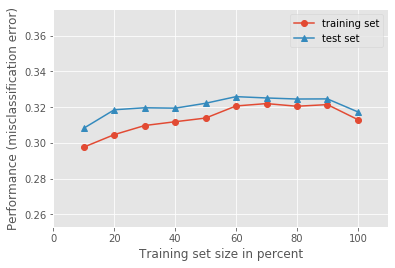

In [174]:
#plot learning curves
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

boosting = AdaBoostClassifier(base_estimator=clf, n_estimators=10)
        
plt.figure()
plot_learning_curves(X_train, y_train, X_test, y_test, boosting, print_model=False, style='ggplot')
plt.show()

##### Gradient Boosting

In [175]:
from sklearn.ensemble import GradientBoostingClassifier
boost_clf = GradientBoostingClassifier(n_estimators=1000,
                                      random_state=3)
boost_clf.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=1000,
                           n_iter_no_change=None, presort='auto',
                           random_state=3, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [176]:
print(boost_clf.score(X_train,y_train))
print(boost_clf.score(X_test,y_test))

0.8325755889740247
0.7975669460722499


##### Ada boosting

##### Decsion Tree classifier

In [160]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3), learning_rate= 0.08,
        n_estimators=100, random_state=0)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=3,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                             

In [177]:
print(ada_clf.score(X_train, y_train))
print(ada_clf.score(X_test, y_test))

0.7942962515499317
0.7851791410132779


##### Random forest ada boost

In [182]:
ada_clf=AdaBoostClassifier(base_estimator=RandomForestClassifier(n_estimators=10), learning_rate=0.08,
        n_estimators=100, random_state=0)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=RandomForestClassifier(bootstrap=True,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features='auto',
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         n_estimators=10,
                         

In [183]:
print(ada_clf.score(X_train, y_train))
print(ada_clf.score(X_test, y_test))


1.0
0.7503152585119798
